### Análise da qualidade dos dados - NBA

In [80]:
import pandas as pd
import seaborn as sns

In [53]:
df_games = pd.read_csv('games.csv').drop_duplicates()
df_games_details = pd.read_csv('games_details.csv')
df_ranking = pd.read_csv('ranking.csv')

In [43]:
df_games[['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home']].head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home
0,2021-03-21,22000645,Final,1610612748,1610612754,2020,1610612748,106.0,0.402,0.826
1,2021-03-21,22000016,Final,1610612745,1610612760,2020,1610612745,112.0,0.494,0.741
2,2021-03-21,22000646,Final,1610612743,1610612740,2020,1610612743,108.0,0.500,0.800
3,2021-03-21,22000167,Final,1610612738,1610612753,2020,1610612738,112.0,0.455,1.000
4,2021-03-21,22000647,Final,1610612751,1610612764,2020,1610612751,113.0,0.489,0.727


In [44]:
df_games[['FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'GAME_DATE_YEAR']].head()

,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,GAME_DATE_YEAR
0,0.243,27.0,51.0,1610612754,109.0,0.388,0.900,0.333,27.0,50.0,0,2021
1,0.368,22.0,38.0,1610612760,114.0,0.462,0.680,0.333,22.0,52.0,0,2021
2,0.353,30.0,37.0,1610612740,113.0,0.482,0.767,0.286,26.0,45.0,0,2021
3,0.426,27.0,45.0,1610612753,96.0,0.381,0.700,0.324,20.0,44.0,1,2021
4,0.310,24.0,35.0,1610612764,106.0,0.532,0.789,0.333,24.0,43.0,1,2021


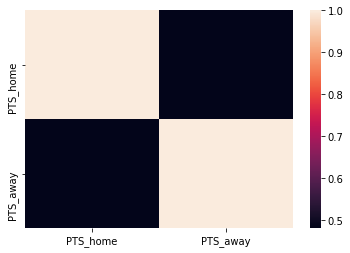

In [81]:
sns.heatmap(df_games[['PTS_home','PTS_away']].corr())

In [70]:
away_win = df_games['HOME_TEAM_WINS'] == 0 
df_games[away_win]['HOME_TEAM_WINS'].count()

9925

In [75]:
df_games['HOME_TEAM_WINS'].value_counts(normalize=True)

1    0.589706
0    0.410294
Name: HOME_TEAM_WINS, dtype: float64

In [61]:
df_games['GAME_ID'].value_counts().head(44)

22000018    2
22000033    2
22000032    2
22000042    2
22000044    2
22000068    2
22000029    2
22000051    2
22000041    2
22000058    2
22000053    2
22000037    2
22000072    2
22000060    2
22000074    2
22000057    2
22000049    2
22000067    2
22000021    2
22000046    2
22000070    2
22000050    2
22000004    2
22000011    2
22000022    2
22000015    2
22000027    2
22000007    2
22000008    2
22000055    2
22000038    2
22000012    2
22000034    2
22000054    2
22000030    2
22000013    2
22000028    2
22000076    2
22000006    2
22000045    2
22000069    2
22000077    2
22000061    2
22000065    2
Name: GAME_ID, dtype: int64

In [65]:
df_games['GAME_DATE_YEAR'].unique()

array([2021, 2020, 2019, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2018, 2017, 2016, 2015], dtype=int64)

In [41]:
df_games.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'GAME_DATE_YEAR'],
      dtype='object')

In [63]:
df_games['GAME_DATE_YEAR'] = df_games['GAME_DATE_EST'].astype('datetime64[ns]').dt.year

In [21]:
year_filter = df_games['GAME_DATE_YEAR'] >= 2004
df_games[year_filter]['GAME_DATE_YEAR'].count()

df_games_filtered = df_games[year_filter]

In [22]:
df_games_filtered.drop_duplicates()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,GAME_DATE_YEAR
0,2021-03-21,22000645,Final,1610612748,1610612754,2020,1610612748,106.0,0.402,0.826,...,51.0,1610612754,109.0,0.388,0.900,0.333,27.0,50.0,0,2021
1,2021-03-21,22000016,Final,1610612745,1610612760,2020,1610612745,112.0,0.494,0.741,...,38.0,1610612760,114.0,0.462,0.680,0.333,22.0,52.0,0,2021
2,2021-03-21,22000646,Final,1610612743,1610612740,2020,1610612743,108.0,0.500,0.800,...,37.0,1610612740,113.0,0.482,0.767,0.286,26.0,45.0,0,2021
3,2021-03-21,22000167,Final,1610612738,1610612753,2020,1610612738,112.0,0.455,1.000,...,45.0,1610612753,96.0,0.381,0.700,0.324,20.0,44.0,1,2021
4,2021-03-21,22000647,Final,1610612751,1610612764,2020,1610612751,113.0,0.489,0.727,...,35.0,1610612764,106.0,0.532,0.789,0.333,24.0,43.0,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24190,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1,2014
24191,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0,2014
24192,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1,2014
24193,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1,2014


In [35]:
year_filter_2 = df_games['GAME_DATE_YEAR'] <= 2003
df_games[year_filter_2]

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,GAME_DATE_YEAR
16269,2003-12-31,20300449,Final,1610612746,1610612743,2003,1610612746,120.0,0.517,0.710,...,46.0,1610612743,104.0,0.494,0.826,0.333,23.0,30.0,1,2003
16270,2003-12-31,20300447,Final,1610612765,1610612757,2003,1610612765,78.0,0.416,0.833,...,41.0,1610612757,71.0,0.400,0.750,0.273,18.0,36.0,1,2003
16271,2003-12-31,20300446,Final,1610612738,1610612740,2003,1610612738,94.0,0.456,0.556,...,42.0,1610612740,96.0,0.418,0.625,0.400,23.0,40.0,0,2003
16272,2003-12-31,20300450,Final,1610612745,1610612755,2003,1610612745,80.0,0.403,0.615,...,50.0,1610612755,72.0,0.347,0.609,0.500,17.0,41.0,1,2003
16273,2003-12-31,20300448,Final,1610612751,1610612744,2003,1610612751,88.0,0.436,0.867,...,36.0,1610612744,70.0,0.400,0.647,0.188,15.0,40.0,1,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,2003-10-07,10300007,Final,1610612748,1610612755,2003,1610612748,86.0,0.352,0.647,...,55.0,1610612755,79.0,0.329,0.897,0.143,7.0,44.0,1,2003
16829,2003-10-07,10300005,Final,1610612757,1610612745,2003,1610612757,104.0,0.527,0.657,...,33.0,1610612745,80.0,0.470,0.667,0.333,10.0,37.0,1,2003
16830,2003-10-07,10300009,Final,1610612758,1610612746,2003,1610612758,101.0,0.467,0.871,...,39.0,1610612746,82.0,0.368,0.609,0.364,13.0,50.0,1,2003
16831,2003-10-06,10300002,Final,1610612763,1610612749,2003,1610612763,105.0,0.494,0.618,...,48.0,1610612749,94.0,0.427,0.700,0.154,20.0,43.0,1,2003


In [36]:
df_games_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22000645,1610612754,IND,Indiana,203200,Justin Holiday,F,NaN,41:45,5.0,...,0.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,15.0,8.0
1,22000645,1610612754,IND,Indiana,1627734,Domantas Sabonis,F,NaN,35:06,5.0,...,2.0,9.0,11.0,1.0,3.0,0.0,5.0,6.0,17.0,-2.0
2,22000645,1610612754,IND,Indiana,1626167,Myles Turner,C,NaN,29:58,4.0,...,1.0,5.0,6.0,1.0,0.0,5.0,2.0,3.0,16.0,6.0
3,22000645,1610612754,IND,Indiana,1627747,Caris LeVert,G,NaN,34:42,5.0,...,0.0,3.0,3.0,3.0,1.0,0.0,0.0,1.0,13.0,1.0
4,22000645,1610612754,IND,Indiana,1627763,Malcolm Brogdon,G,NaN,40:35,4.0,...,3.0,3.0,6.0,10.0,1.0,0.0,2.0,1.0,12.0,6.0


In [37]:
df_games_details.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
START_POSITION       371732
COMMENT              505332
MIN                   97436
FGM                   97436
FGA                   97436
FG_PCT                97436
FG3M                  97436
FG3A                  97436
FG3_PCT               97436
FTM                   97436
FTA                   97436
FT_PCT                97436
OREB                  97436
DREB                  97436
REB                   97436
AST                   97436
STL                   97436
BLK                   97436
TO                    97436
PF                    97436
PTS                   97436
PLUS_MINUS           121097
dtype: int64

In [38]:
df_ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612762,0,22020,2021-03-21,West,Utah,41,30,11,0.732,16-2,14-9,NaN
1,1610612756,0,22020,2021-03-21,West,Phoenix,41,28,13,0.683,15-8,13-5,NaN
2,1610612747,0,22020,2021-03-21,West,L.A. Lakers,43,28,15,0.651,14-9,14-6,NaN
3,1610612746,0,22020,2021-03-21,West,LA Clippers,43,27,16,0.628,14-6,13-10,NaN
4,1610612743,0,22020,2021-03-21,West,Denver,42,25,17,0.595,12-9,13-8,NaN


In [40]:
df_ranking.isnull().sum()

TEAM_ID               0
LEAGUE_ID             0
SEASON_ID             0
STANDINGSDATE         0
CONFERENCE            0
TEAM                  0
G                     0
W                     0
L                     0
W_PCT                 0
HOME_RECORD           0
ROAD_RECORD           0
RETURNTOPLAY     187122
dtype: int64